In [2]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
col = px.colors.qualitative.Pastel

from pandas import DataFrame

from matplotlib import pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
np.random.seed(seed=42)

import plotly.io as pio
pio.renderers.default = "notebook_connected"
from datetime import timedelta
from plotly.subplots import make_subplots

random.seed(42)

### 데이터 정돈

In [21]:
train1 = pd.read_csv('train_dangjin_floating_0518.csv')
train2 = pd.read_csv('train_dangjin_warehouse_0518.csv')
train3 = pd.read_csv('train_dangjin_0518.csv')
train4 = pd.read_csv('train_ulsan_0518.csv')

test1 = pd.read_csv('test_dangjin_floating_0518.csv')
test2 = pd.read_csv('test_dangjin_warehouse_0518.csv')
test3 = pd.read_csv('test_dangjin_0518.csv')
test4 = pd.read_csv('test_ulsan_0518.csv')

In [ ]:
train1['date'] = pd.to_datetime(train1['date'])
train2['date'] = pd.to_datetime(train2['date'])
train3['date'] = pd.to_datetime(train3['date'])
train4['date'] = pd.to_datetime(train4['date'])
test1['date'] = pd.to_datetime(test1['date'])
test2['date'] = pd.to_datetime(test2['date'])
test3['date'] = pd.to_datetime(test3['date'])
test4['date'] = pd.to_datetime(test4['date'])

train1['day of year'] = train1['date'].apply(lambda x : x.timetuple().tm_yday)
train2['day of year'] = train2['date'].apply(lambda x : x.timetuple().tm_yday)
train3['day of year'] = train3['date'].apply(lambda x : x.timetuple().tm_yday)
train4['day of year'] = train4['date'].apply(lambda x : x.timetuple().tm_yday)
test1['day of year'] = test1['date'].apply(lambda x : x.timetuple().tm_yday)
test2['day of year'] = test2['date'].apply(lambda x : x.timetuple().tm_yday)
test3['day of year'] = test3['date'].apply(lambda x : x.timetuple().tm_yday)
test4['day of year'] = test4['date'].apply(lambda x : x.timetuple().tm_yday)

In [ ]:
train1['hour'] = train1['date'].apply(lambda x : x.timetuple().tm_hour)
train2['hour'] = train2['date'].apply(lambda x : x.timetuple().tm_hour)
train3['hour'] = train3['date'].apply(lambda x : x.timetuple().tm_hour)
train4['hour'] = train4['date'].apply(lambda x : x.timetuple().tm_hour)
test1['hour'] = test1['date'].apply(lambda x : x.timetuple().tm_hour)
test2['hour'] = test2['date'].apply(lambda x : x.timetuple().tm_hour)
test3['hour'] = test3['date'].apply(lambda x : x.timetuple().tm_hour)
test4['hour'] = test4['date'].apply(lambda x : x.timetuple().tm_hour)

In [ ]:
train1['day'] = 0
train2['day'] = 0
train3['day'] = 0
train4['day'] = 0
test1['day'] = 0
test2['day'] = 0
test3['day'] = 0
test4['day'] = 0

train1['day'][train1['sin(elev ang)']>0] = 1
train2['day'][train2['sin(elev ang)']>0] = 1
train3['day'][train3['sin(elev ang)']>0] = 1
train4['day'][train4['sin(elev ang)']>0] = 1
test1['day'][test1['sin(elev ang)']>0] = 1
test2['day'][test2['sin(elev ang)']>0] = 1
test3['day'][test3['sin(elev ang)']>0] = 1
test4['day'][test4['sin(elev ang)']>0] = 1

In [ ]:
train1 = train1.drop(['date'], axis=1)
train2 = train2.drop(['date'], axis=1)
train3 = train3.drop(['date'], axis=1)
train4 = train4.drop(['date'], axis=1)

test1 = test1.drop(['date'], axis=1)
test2 = test2.drop(['date'], axis=1)
test3 = test3.drop(['date'], axis=1)
test4 = test4.drop(['date'], axis=1)

In [ ]:
y1 = train1['energy']
y2 = train2['energy']
y3 = train3['energy']
y4 = train4['energy']

X1 = train1.drop(['energy'], axis=1)
X2 = train2.drop(['energy'], axis=1)
X3 = train3.drop(['energy'], axis=1)
X4 = train4.drop(['energy'], axis=1)

### 모델링

In [ ]:
import lightgbm as lgb

In [22]:
train_1 = lgb.Dataset(X1, label = y1)
train_2 = lgb.Dataset(X2, label = y2)
train_3 = lgb.Dataset(X3, label = y3)
train_4 = lgb.Dataset(X4, label = y4)

In [20]:
y1 = train1['energy']
y2 = train2['energy']
y3 = train3['energy']
y4 = train4['energy']

X1 = train1.drop(['energy'], axis=1)
X2 = train2.drop(['energy'], axis=1)
X3 = train3.drop(['energy'], axis=1)
X4 = train4.drop(['energy'], axis=1)

In [23]:
params = {
    'learning_rate' : 0.01,
    'max_depth' : -1,
    'boosting' : 'gbdt',
    'objective' : 'regression',
    'metric' : 'mae',
    'is_training_metric' : True,
    'seed' : 4716
}

In [24]:
model1 = lgb.train(params, train_1, 1000)
model2 = lgb.train(params, train_2, 1000)
model3 = lgb.train(params, train_3, 1000)
model4 = lgb.train(params, train_4, 1000)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2079
[LightGBM] [Info] Number of data points in the train set: 25608, number of used features: 11
[LightGBM] [Info] Start training from score 121.885270
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2079
[LightGBM] [Info] Number of data points in the train set: 25608, number of used features: 11
[LightGBM] [Info] Start training from score 92.268510
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the ov

In [25]:
y1_pred = model1.predict(test1)
y2_pred = model2.predict(test2)
y3_pred = model3.predict(test3)
y4_pred = model4.predict(test4)

### submission

In [26]:
test1['energy'] = y1_pred
test2['energy'] = y2_pred
test3['energy'] = y3_pred
test4['energy'] = y4_pred

In [27]:
test1

,Temperatrue,Humidity,Cloud,Wind_x,Wind_y,sin(elev ang),sin(azimuth ang),cos(azimuth ang),day of year,hour,day,energy
0,7.132962,83.178948,3.666667,-5.370062,-0.262726,-0.937882,0.311536,0.950234,32,1,0,0.849637
1,7.135200,87.169150,3.666667,-4.202990,-1.004434,-0.889797,0.765960,0.642888,32,2,0,-3.577490
2,7.000000,90.000000,3.666667,-3.029422,-1.543568,-0.793472,0.931953,0.362578,32,3,0,-1.698169
3,6.731660,90.373839,3.666667,-2.281112,-1.704423,-0.655473,0.988033,0.154242,32,4,0,-0.848836
4,6.378536,89.684808,3.666667,-1.935833,-1.660554,-0.485204,0.999905,-0.013790,32,5,0,-1.076750
...,...,...,...,...,...,...,...,...,...,...,...,...
666,7.984495,65.320044,3.666667,0.908123,0.011843,-0.181196,-0.998490,-0.054939,59,19,0,-0.569768
667,7.365373,68.589368,3.666667,1.091925,0.237053,-0.380987,-0.994504,0.104697,59,20,0,0.368358
668,7.000000,70.000000,3.666667,1.236373,0.401722,-0.561067,-0.959655,0.281179,59,21,0,0.188366
669,6.745738,69.743965,3.666667,1.290033,0.544525,-0.709165,-0.872449,0.488704,59,22,0,-0.013921


In [37]:
test1['energy'][test1['sin(elev ang)']<0] = 0
test2['energy'][test2['sin(elev ang)']<0] = 0
test3['energy'][test3['sin(elev ang)']<0] = 0
test4['energy'][test4['sin(elev ang)']<0] = 0

C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [38]:
test1['energy'][test1['energy']<0] = 0
test2['energy'][test2['energy']<0] = 0
test3['energy'][test3['energy']<0] = 0
test4['energy'][test4['energy']<0] = 0

C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [39]:
test1

,Temperatrue,Humidity,Cloud,Wind_x,Wind_y,sin(elev ang),sin(azimuth ang),cos(azimuth ang),day of year,hour,day,energy
0,7.132962,83.178948,3.666667,-5.370062,-0.262726,-0.937882,0.311536,0.950234,32,1,0,0.0
1,7.135200,87.169150,3.666667,-4.202990,-1.004434,-0.889797,0.765960,0.642888,32,2,0,0.0
2,7.000000,90.000000,3.666667,-3.029422,-1.543568,-0.793472,0.931953,0.362578,32,3,0,0.0
3,6.731660,90.373839,3.666667,-2.281112,-1.704423,-0.655473,0.988033,0.154242,32,4,0,0.0
4,6.378536,89.684808,3.666667,-1.935833,-1.660554,-0.485204,0.999905,-0.013790,32,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
666,7.984495,65.320044,3.666667,0.908123,0.011843,-0.181196,-0.998490,-0.054939,59,19,0,0.0
667,7.365373,68.589368,3.666667,1.091925,0.237053,-0.380987,-0.994504,0.104697,59,20,0,0.0
668,7.000000,70.000000,3.666667,1.236373,0.401722,-0.561067,-0.959655,0.281179,59,21,0,0.0
669,6.745738,69.743965,3.666667,1.290033,0.544525,-0.709165,-0.872449,0.488704,59,22,0,0.0


In [40]:
sub = pd.read_csv('sample_submission.csv')

In [41]:
sub.iloc[:671]

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0,0,0,0
1,2021-02-01 02:00:00,0,0,0,0
2,2021-02-01 03:00:00,0,0,0,0
3,2021-02-01 04:00:00,0,0,0,0
4,2021-02-01 05:00:00,0,0,0,0
...,...,...,...,...,...
666,2021-02-28 19:00:00,0,0,0,0
667,2021-02-28 20:00:00,0,0,0,0
668,2021-02-28 21:00:00,0,0,0,0
669,2021-02-28 22:00:00,0,0,0,0


In [42]:
sub['dangjin_floating'] = test1['energy']
sub['dangjin_warehouse'] = test2['energy']
sub['dangjin'] = test3['energy']
sub['ulsan'] = test4['energy']

In [43]:
sub.to_csv('submission_ldh_0518_2.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

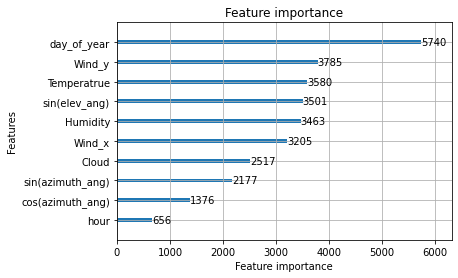

In [47]:
lgb.plot_importance(model1)